In [47]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv("Case_1.csv")

In [5]:
df1.head()

,Unnamed: 0,Article,Summary,Source,Topic,Number,AI Summary,Bert Mean Precision,Bert Mean Recall,Bert Mean F1,Information Coverage for Humans,Information Coverage for AI
0,0,Donor attacks Blair-Brown 'feud'\n\nThe report...,"Mr Bannatyne has previously given Labour Â£50,...",BBC,politics,276,"Duncan Bannatyne, a Labour donor, has indicate...",0.863322,0.869489,0.866394,0.881023,0.676542
1,1,Cardinal criticises Iraq war cost\n\nBillions ...,"""How is it that peace has not arrived?,"" the c...",BBC,politics,60,Cardinal Cormac Murphy-O'Connor strongly criti...,0.855350,0.865756,0.860522,0.896153,0.745083
2,2,BNP leader Nick Griffin arrested\n\nThe leader...,Mr Griffin is the twelfth man to be arrested f...,BBC,politics,74,"Nick Griffin, the leader of the British Nation...",0.901813,0.884664,0.893156,0.847424,0.703660
3,3,Anglers 'could face prosecution'\n\nAnglers an...,The committee also said some legal protections...,BBC,politics,48,A committee of MPs has expressed concern that ...,0.860897,0.880845,0.870757,0.897537,0.728339
4,4,Green fear for transport ballot\n\nThe Green P...,The ballot will ask residents to vote for or a...,BBC,politics,114,The Green Party is expressing concern that man...,0.896584,0.882001,0.889233,0.885219,0.792420


/var/folders/w7/9s4d3nqs6ssgjs6s0vgdy27w0000gn/T/ipykernel_94373/376734186.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1['Information Coverage for Humans'], shade=True, label="Humans", color="blue")
/var/folders/w7/9s4d3nqs6ssgjs6s0vgdy27w0000gn/T/ipykernel_94373/376734186.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1['Information Coverage for AI'], shade=True, label="AI", color="orange")


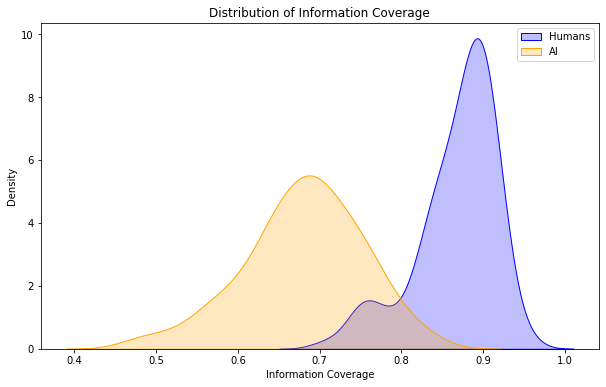

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distributions
plt.figure(figsize=(10, 6))

# Distribution for "Information Coverage for Humans"
sns.kdeplot(df1['Information Coverage for Humans'], shade=True, label="Humans", color="blue")

# Distribution for "Information Coverage for AI"
sns.kdeplot(df1['Information Coverage for AI'], shade=True, label="AI", color="orange")

# Add labels and legend
plt.title("Distribution of Information Coverage")
plt.xlabel("Information Coverage")
plt.ylabel("Density")
plt.legend()
plt.show()

In [62]:
df = pd.read_csv("Case_2.csv")

In [63]:
df.head()

,Unnamed: 0,title,body,source,bias,words,Ai bias and explanation
0,15,New LAPD chief says he will work to protect im...,LOS ANGELES (AP) — The new chief of the Los An...,APNEWS,Left,669,Lean Left \nThe article focuses on the LAPD c...
1,274,Barron Trump's Voice Heard in Video for First ...,Many on social are surprised after watching a ...,NewsWeek,Center,1105,Lean Right \nThe article predominantly portra...
2,213,DNC hopes to highlight success ahead of post-e...,The Democratic National Committee is hoping to...,ABC,Lean Left,943,Lean Left \nThe article focuses on the Democr...
3,92,Exclusive — NYC Councilwoman Vickie Paladino o...,New York City Councilwoman Vickie Paladino fea...,Breitbart,Right,528,Lean Right \nThe article reflects a Lean Righ...
4,327,Social Security update: First round of Decembe...,Playback speedNormalQuality-Playback speed0.25...,WashingtonExaminer,Lean Right,617,Center \nThe article presents factual informa...


In [64]:
# Ensure the column is a string
df['Ai bias and explanation'] = df['Ai bias and explanation'].astype(str)

# Manually split the column into two new columns
df['AI bias'] = df['Ai bias and explanation'].apply(lambda x: x.split('\n', 1)[0]).str.strip()
df['explanation'] = df['Ai bias and explanation'].apply(lambda x: x.split('\n', 1)[1] if '\n' in x else '')

# Drop the original column if no longer needed
df = df.drop(columns=['Ai bias and explanation'])

In [65]:
df.head()

,Unnamed: 0,title,body,source,bias,words,AI bias,explanation
0,15,New LAPD chief says he will work to protect im...,LOS ANGELES (AP) — The new chief of the Los An...,APNEWS,Left,669,Lean Left,The article focuses on the LAPD chief's commit...
1,274,Barron Trump's Voice Heard in Video for First ...,Many on social are surprised after watching a ...,NewsWeek,Center,1105,Lean Right,The article predominantly portrays Barron Trum...
2,213,DNC hopes to highlight success ahead of post-e...,The Democratic National Committee is hoping to...,ABC,Lean Left,943,Lean Left,The article focuses on the Democratic National...
3,92,Exclusive — NYC Councilwoman Vickie Paladino o...,New York City Councilwoman Vickie Paladino fea...,Breitbart,Right,528,Lean Right,"The article reflects a Lean Right bias, as it ..."
4,327,Social Security update: First round of Decembe...,Playback speedNormalQuality-Playback speed0.25...,WashingtonExaminer,Lean Right,617,Center,The article presents factual information about...


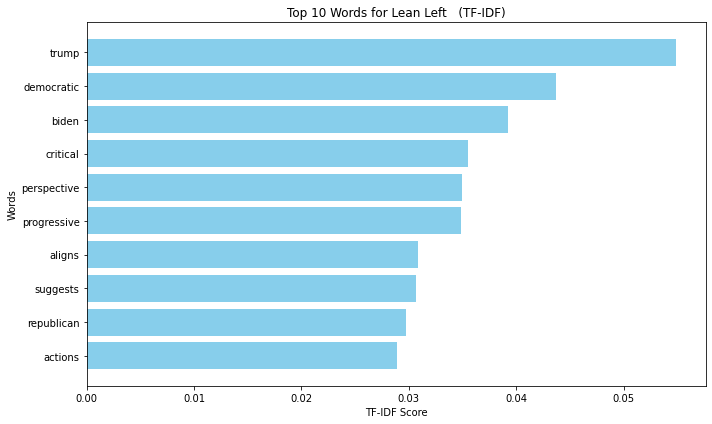

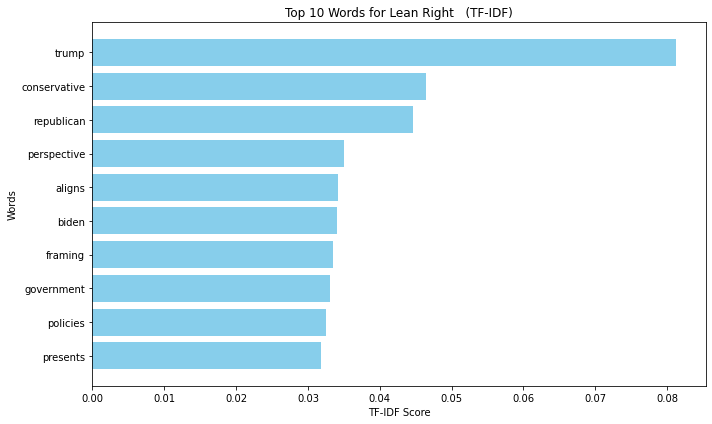

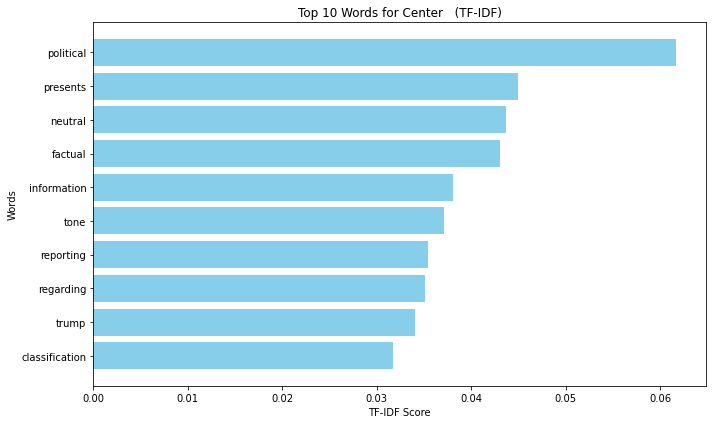

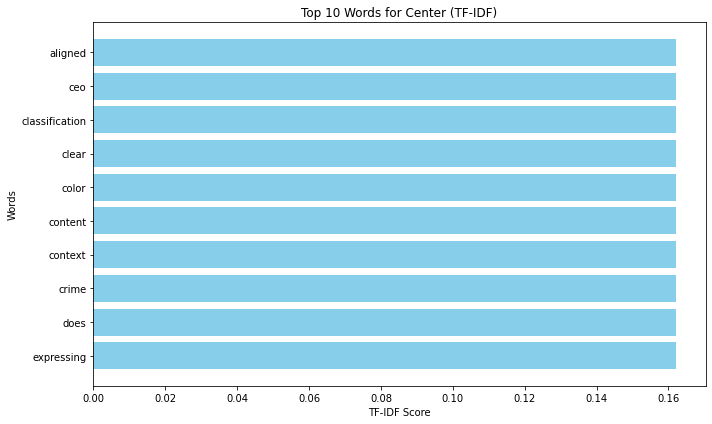

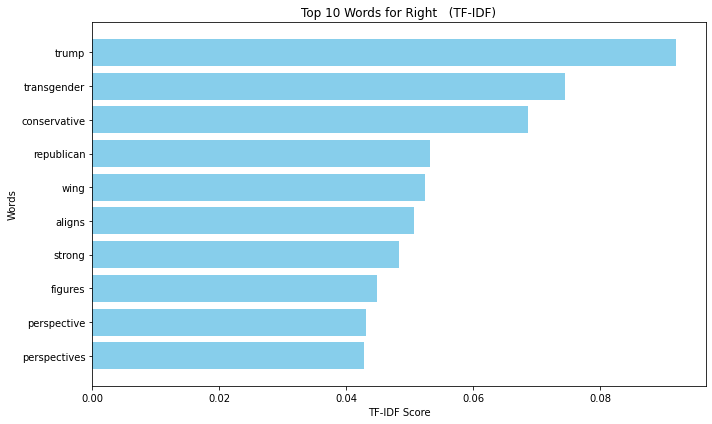

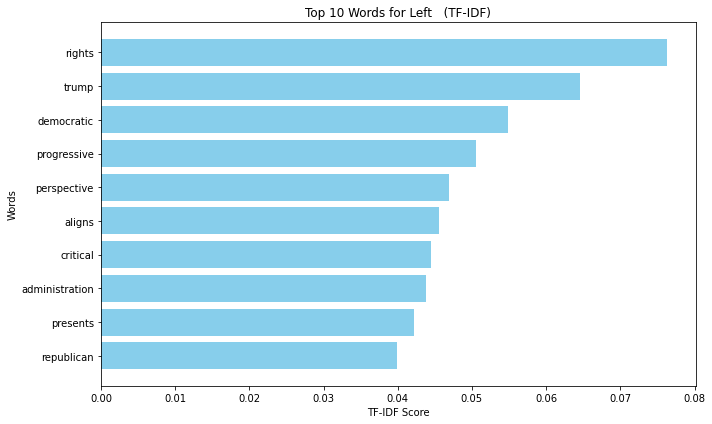

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt

# Define custom stop words
custom_stop_words = {"articles", "language", "lean", "left", "right", "center", "bias", "article", "leaning", "artical", "media" }  # Add other meaningless words

# Combine custom stop words with built-in English stop words
stop_words = list(ENGLISH_STOP_WORDS.union(custom_stop_words))  # Convert to a list

# Function to compute TF-IDF and plot top words for each group
def compute_tfidf_and_plot(df, group_col, text_col, top_n=10):
    for group in df[group_col].unique():
        # Filter the group data
        group_data = df[df[group_col] == group]
        
        # Initialize TF-IDF Vectorizer with combined stop words
        tfidf = TfidfVectorizer(stop_words=stop_words)
        
        # Fit and transform the text data
        tfidf_matrix = tfidf.fit_transform(group_data[text_col])
        
        # Get feature names and their corresponding scores
        feature_names = tfidf.get_feature_names_out()
        scores = tfidf_matrix.mean(axis=0).A1  # Average TF-IDF scores for the group
        
        # Create a DataFrame for the top N words
        group_top_words = pd.DataFrame({
            'word': feature_names,
            'score': scores
        }).nlargest(top_n, 'score')

        # Plot the top N words
        plt.figure(figsize=(10, 6))
        plt.barh(group_top_words['word'], group_top_words['score'], color='skyblue')
        plt.gca().invert_yaxis()  # Invert y-axis to show the highest score at the top
        plt.title(f'Top {top_n} Words for {group} (TF-IDF)')
        plt.xlabel('TF-IDF Score')
        plt.ylabel('Words')
        plt.tight_layout()
        plt.show()

# Apply the function to your dataset
compute_tfidf_and_plot(df, group_col='AI bias', text_col='explanation', top_n=10)

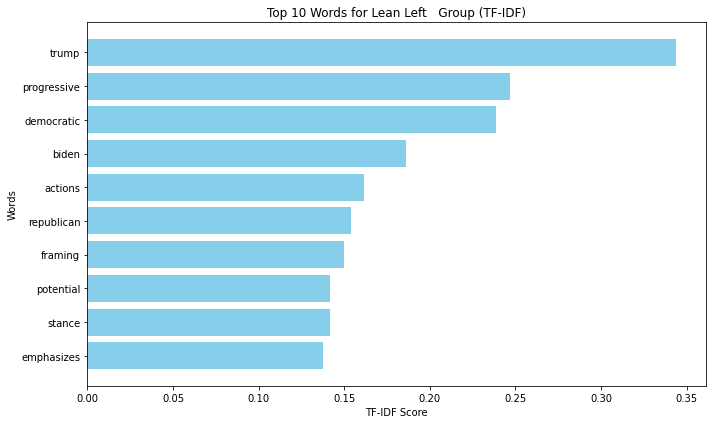

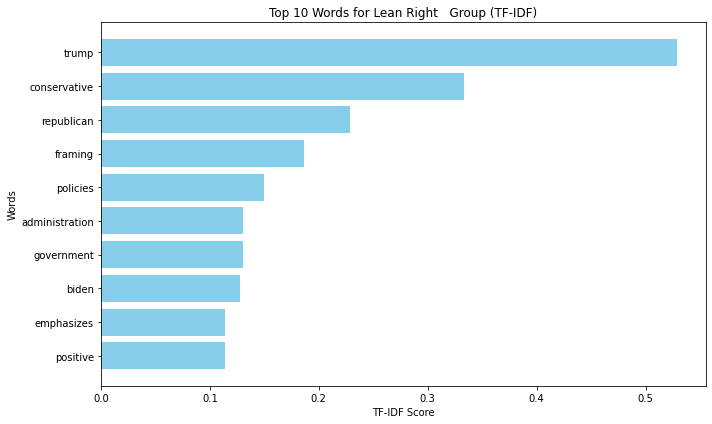

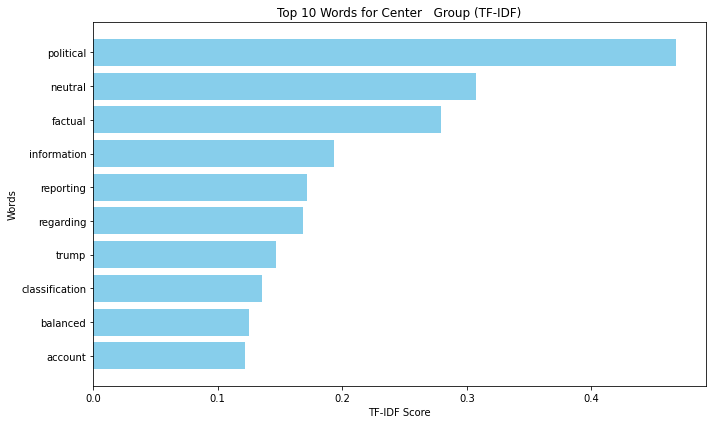

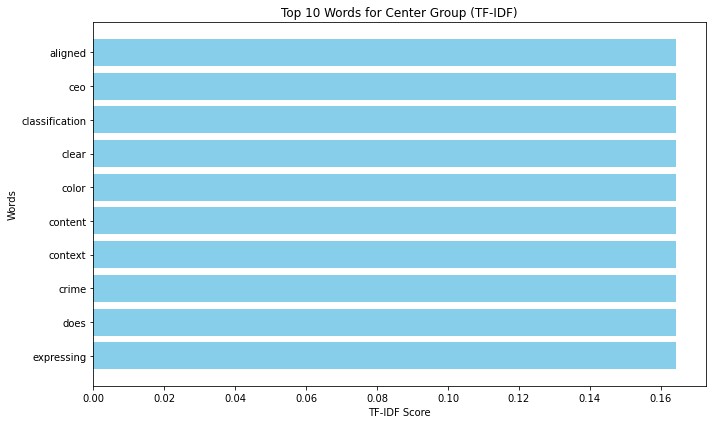

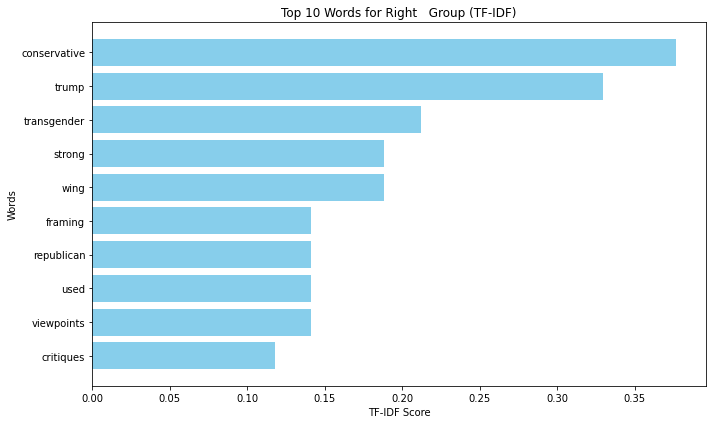

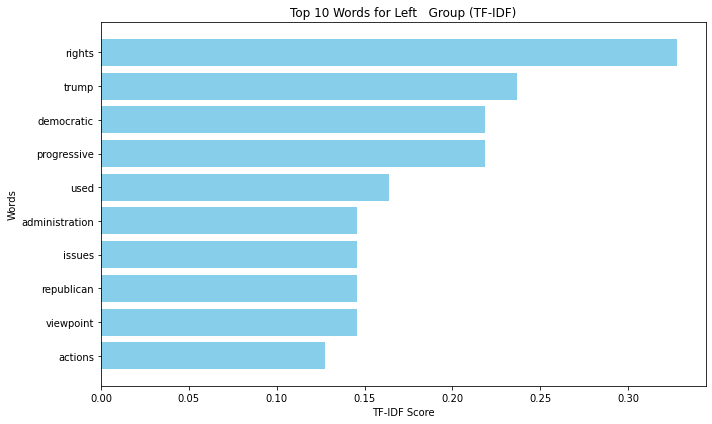

In [59]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Define custom stop words
custom_stop_words = [
    "articles", "language", "lean", "left", "right", "center", "perspective", "perspectives", "tone",
    "bias", "article", "leaning", "aligns", "media","suggests", "focus", "highlights", "presents", "critical"
]

# Combine with default English stop words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
combined_stop_words = list(ENGLISH_STOP_WORDS.union(custom_stop_words))

# Function to compute group-specific TF-IDF and plot top words
def compute_group_specific_tfidf_and_plot(df, group_col, text_col, top_n=10):
    for group in df[group_col].unique():
        # Filter the group data
        group_data = df[df[group_col] == group]
        
        # Combine all text in the group into a single document
        combined_text = " ".join(group_data[text_col].dropna())
        
        # Initialize TF-IDF Vectorizer with combined stop words
        tfidf = TfidfVectorizer(stop_words=combined_stop_words)
        
        # Fit and transform the single document (corpus for this group)
        tfidf_matrix = tfidf.fit_transform([combined_text])  # Single document
        
        # Get feature names and their corresponding scores
        feature_names = tfidf.get_feature_names_out()
        scores = tfidf_matrix.toarray()[0]  # Convert sparse matrix to array
        
        # Create a DataFrame for the top N words
        group_top_words = pd.DataFrame({
            'word': feature_names,
            'score': scores
        }).nlargest(top_n, 'score')

        # Plot the top N words
        plt.figure(figsize=(10, 6))
        plt.barh(group_top_words['word'], group_top_words['score'], color='skyblue')
        plt.gca().invert_yaxis()  # Invert y-axis to show the highest score at the top
        plt.title(f'Top {top_n} Words for {group} Group (TF-IDF)')
        plt.xlabel('TF-IDF Score')
        plt.ylabel('Words')
        plt.tight_layout()
        plt.show()

# Apply the function to your dataset
compute_group_specific_tfidf_and_plot(df, group_col='AI bias', text_col='explanation', top_n=10)

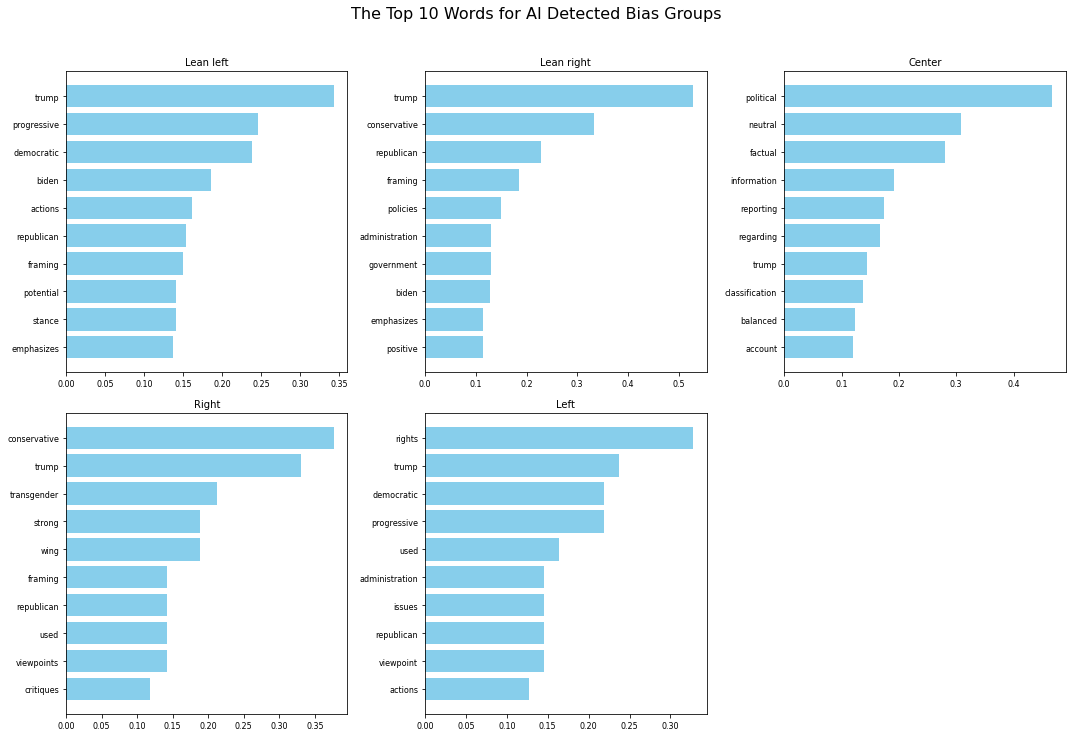

In [71]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Define custom stop words
custom_stop_words = [
    "articles", "language", "lean", "left", "right", "center", "perspective", "perspectives", "tone",
    "bias", "article", "leaning", "aligns", "media", "suggests", "focus", "highlights", "presents", "critical"
]

# Combine with default English stop words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
combined_stop_words = list(ENGLISH_STOP_WORDS.union(custom_stop_words))

# Function to compute group-specific TF-IDF and plot top words in a grid layout
def compute_group_specific_tfidf_and_plot_grid(df, group_col, text_col, top_n=10, grid_shape=(2, 3)):
    unique_groups = df[group_col].unique()
    n_groups = len(unique_groups)

    # Create subplots
    fig, axes = plt.subplots(grid_shape[0], grid_shape[1], figsize=(15, 10))  # Adjust figure size as needed
    axes = axes.flatten()  # Flatten the grid for easy indexing

    for i, group in enumerate(unique_groups):
        # Filter the group data
        group_data = df[df[group_col] == group]
        
        # Combine all text in the group into a single document
        combined_text = " ".join(group_data[text_col].dropna())
        
        # Initialize TF-IDF Vectorizer with combined stop words
        tfidf = TfidfVectorizer(stop_words=combined_stop_words)
        
        # Fit and transform the single document (corpus for this group)
        tfidf_matrix = tfidf.fit_transform([combined_text])  # Single document
        
        # Get feature names and their corresponding scores
        feature_names = tfidf.get_feature_names_out()
        scores = tfidf_matrix.toarray()[0]  # Convert sparse matrix to array
        
        # Create a DataFrame for the top N words
        group_top_words = pd.DataFrame({
            'word': feature_names,
            'score': scores
        }).nlargest(top_n, 'score')

        # Plot on the current axis
        ax = axes[i]
        ax.barh(group_top_words['word'], group_top_words['score'], color='skyblue')
        ax.invert_yaxis()  # Invert y-axis to show the highest score at the top

         # Add group name as the subplot's title
        ax.set_title(group.capitalize(), fontsize=10)  # Only group name

        # Remove individual x-label and y-label
        ax.set_xlabel('')
        ax.set_ylabel('')

        # Adjust tick labels for better readability
        ax.tick_params(axis='x', labelsize=8)  # Smaller font for x-axis ticks
        ax.tick_params(axis='y', labelsize=8)

        # Shared title for all subplots
        fig.suptitle(f'The Top {top_n} Words for AI Detected Bias Groups', fontsize=16, y=1.02)

    # Hide unused subplots if there are fewer groups than grid cells
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Apply the function to your dataset
compute_group_specific_tfidf_and_plot_grid(df, group_col='AI bias', text_col='explanation', top_n=10, grid_shape=(2, 3))

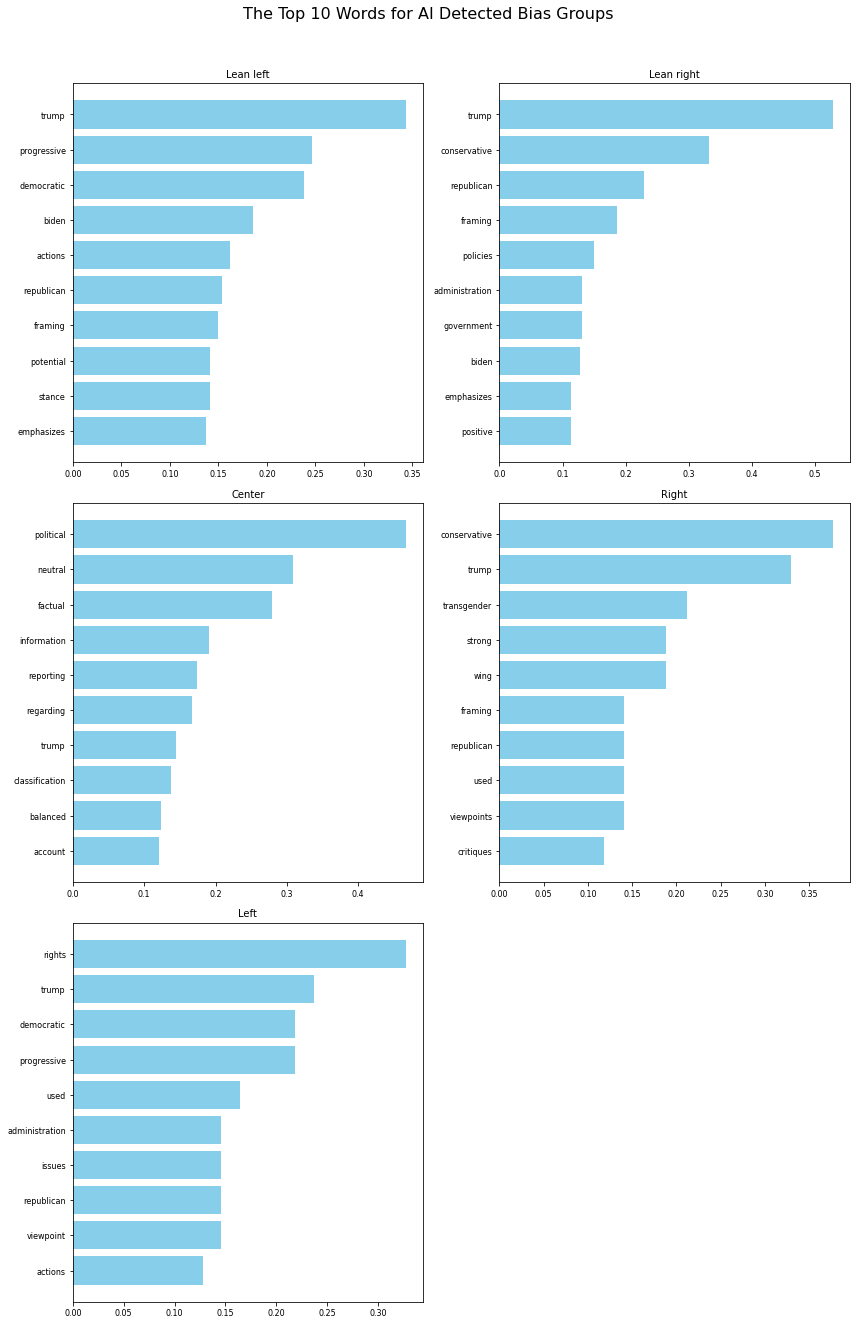

In [75]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Define custom stop words
custom_stop_words = [
    "articles", "language", "lean", "left", "right", "center", "perspective", "perspectives", "tone",
    "bias", "article", "leaning", "aligns", "media", "suggests", "focus", "highlights", "presents", "critical"
]

# Combine with default English stop words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
combined_stop_words = list(ENGLISH_STOP_WORDS.union(custom_stop_words))

# Function to compute group-specific TF-IDF and plot top words in a grid layout
def compute_group_specific_tfidf_and_plot_grid(df, group_col, text_col, top_n=10, grid_shape=(3, 2)):
    unique_groups = df[group_col].unique()
    n_groups = len(unique_groups)

    # Create subplots with 2 columns and 3 rows
    fig, axes = plt.subplots(grid_shape[0], grid_shape[1], figsize=(12, 18))  # Adjust figure size as needed
    axes = axes.flatten()  # Flatten the grid for easy indexing

    for i, group in enumerate(unique_groups):
        # Filter the group data
        group_data = df[df[group_col] == group]
        
        # Combine all text in the group into a single document
        combined_text = " ".join(group_data[text_col].dropna())
        
        # Initialize TF-IDF Vectorizer with combined stop words
        tfidf = TfidfVectorizer(stop_words=combined_stop_words)
        
        # Fit and transform the single document (corpus for this group)
        tfidf_matrix = tfidf.fit_transform([combined_text])  # Single document
        
        # Get feature names and their corresponding scores
        feature_names = tfidf.get_feature_names_out()
        scores = tfidf_matrix.toarray()[0]  # Convert sparse matrix to array
        
        # Create a DataFrame for the top N words
        group_top_words = pd.DataFrame({
            'word': feature_names,
            'score': scores
        }).nlargest(top_n, 'score')

        # Plot on the current axis
        ax = axes[i]
        ax.barh(group_top_words['word'], group_top_words['score'], color='skyblue')
        ax.invert_yaxis()  # Invert y-axis to show the highest score at the top

        # Add group name as the subplot's title
        ax.set_title(group.capitalize(), fontsize=10)  # Only group name

        # Remove individual x-label and y-label
        ax.set_xlabel('')
        ax.set_ylabel('')

        # Adjust tick labels for better readability
        ax.tick_params(axis='x', labelsize=8)  # Smaller font for x-axis ticks
        ax.tick_params(axis='y', labelsize=8)

    # Add a shared title for all subplots
    fig.suptitle(f'The Top {top_n} Words for AI Detected Bias Groups', fontsize=16, y=1.02)
    
    # Hide unused subplots if there are fewer groups than grid cells
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Apply the function to your dataset
compute_group_specific_tfidf_and_plot_grid(df, group_col='AI bias', text_col='explanation', top_n=10, grid_shape=(3, 2))

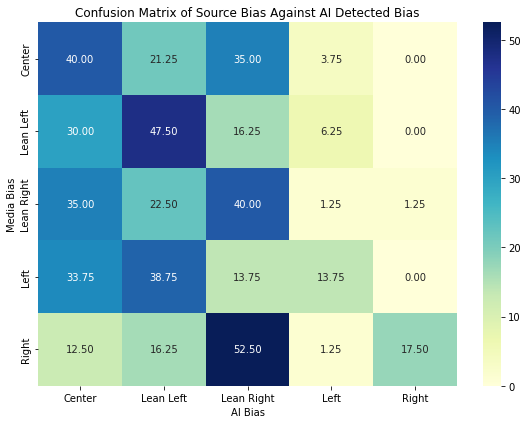

In [72]:
# Generate a crosstab to calculate percentages
confusion_matrix = pd.crosstab(df['bias'], df['AI bias'], normalize='index') * 100

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Confusion Matrix of Source Bias Against AI Detected Bias")
plt.xlabel("AI Bias")
plt.ylabel("Media Bias")
plt.tight_layout()
plt.show()

In [48]:
# Step 1: Compute TF-IDF scores for the text in the 'explanation' column
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['explanation'])

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define custom stop words
custom_stop_words = [
    "articles", "language", "lean", "left", "right", "center", "perspective", "perspectives", "tone",
    "bias", "article", "leaning", "aligns", "media","suggests", "focus", "highlights", "presents", "critical"
]

# Combine custom stop words with built-in English stop words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
combined_stop_words = list(ENGLISH_STOP_WORDS.union(custom_stop_words))

# Initialize TF-IDF Vectorizer with combined stop words
tfidf = TfidfVectorizer(stop_words=combined_stop_words)

# Fit and transform your text data
tfidf_matrix = tfidf.fit_transform(df['explanation'])

In [53]:
# Step 2: Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

# Step 3: Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame({
    't-SNE 1': tsne_results[:, 0],
    't-SNE 2': tsne_results[:, 1],
    'AI bias': df['AI bias']
})



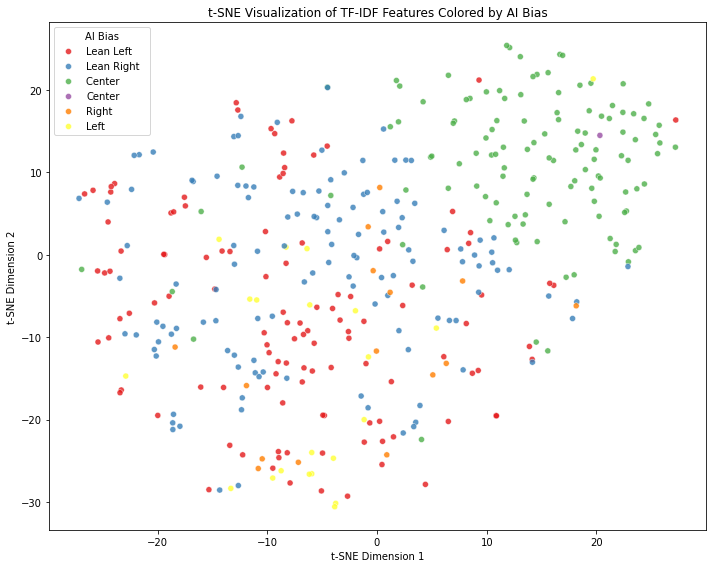

In [54]:
# Step 4: Plot t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=tsne_df,
    x='t-SNE 1', y='t-SNE 2',
    hue='AI bias',
    palette=sns.color_palette('Set1', len(df['AI bias'].unique())),
    alpha=0.8
)
plt.title('t-SNE Visualization of TF-IDF Features Colored by AI Bias')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='AI Bias')
plt.tight_layout()
plt.show()

In [68]:
from sklearn.decomposition import PCA
# Step 2: Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_results = pca.fit_transform(tfidf_matrix.toarray())

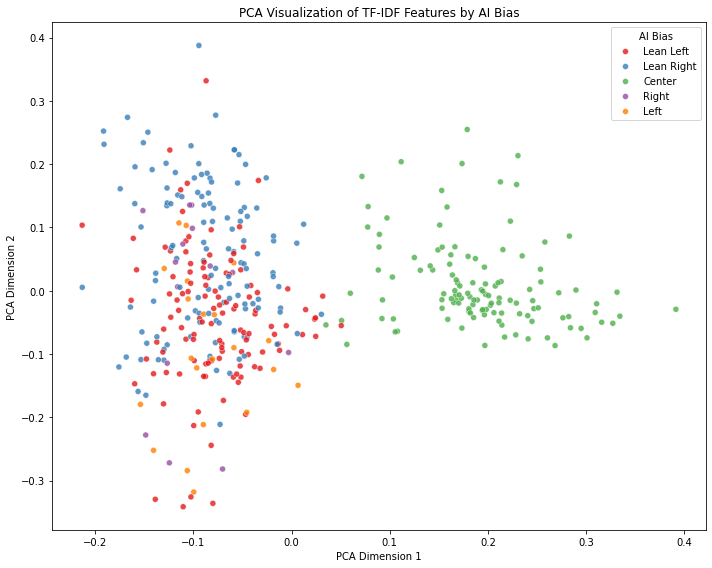

In [69]:
# Step 3: Create a DataFrame for PCA results
pca_df = pd.DataFrame({
    'PCA 1': pca_results[:, 0],
    'PCA 2': pca_results[:, 1],
    'AI bias': df['AI bias']
})

# Step 4: Visualize the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=pca_df,
    x='PCA 1', y='PCA 2',
    hue='AI bias',
    palette=sns.color_palette('Set1', len(df['AI bias'].unique())),
    alpha=0.8
)
plt.title('PCA Visualization of TF-IDF Features by AI Bias')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend(title='AI Bias')
plt.tight_layout()
plt.show()

In [76]:
df2 = pd.read_csv("Case_3.csv")

In [78]:
df2.head(3)

,Unnamed: 0,title,body,source,bias,words,Raw AI Bias Detection,AI Bias Classification,AI Classification Explanation,AI Summary,Raw AI Summary Bias Detection,AI Summary Bias Classification,AI Summary Classification Explanation
0,13,Here’s who Trump might pick for defense secret...,Fox News personality Pete Hegseth appears to b...,AlterNet,Left,474,Lean Right \nThe article includes critical de...,Lean Right,The article includes critical details about Re...,Donald Trump is facing challenges in confirmin...,Lean Left \nThe article presents critical per...,Lean Left,The article presents critical perspectives on ...
1,139,Chris Cuomo Says Biden Pardon ‘Gave Trump The ...,NewsNation host Chris Cuomo argued Tuesday tha...,DailyCaller,Right,590,Lean Left \nThe article critiques President B...,Lean Left,The article critiques President Biden's pardon...,"Chris Cuomo, host of NewsNation, criticized Pr...",Lean Left \nThe article reflects a critical v...,Lean Left,The article reflects a critical viewpoint towa...
2,80,Calif. Reaffirms Commitment to Gender Transiti...,California Attorney General Rob Bonta doubled-...,NewsMax,Right,399,Lean Left \nThe article presents California's...,Lean Left,The article presents California's commitment t...,California Attorney General Rob Bonta reaffirm...,Lean Left \nThe article highlights California...,Lean Left,The article highlights California's commitment...


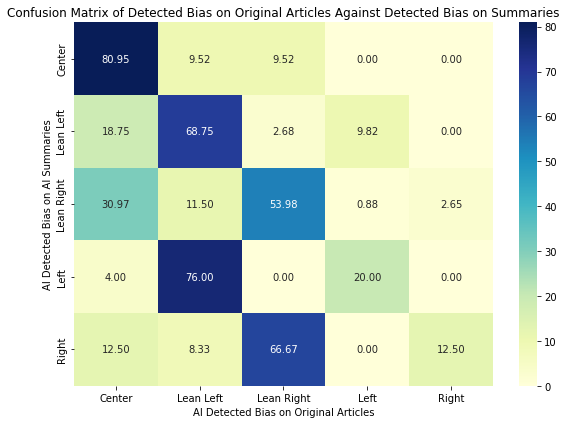

In [82]:
# Generate a crosstab to calculate percentages
confusion_matrix2 = pd.crosstab(df2['AI Bias Classification'], df2['AI Summary Bias Classification'], normalize='index') * 100

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix2, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Confusion Matrix of Detected Bias on Original Articles Against Detected Bias on Summaries")
plt.xlabel("AI Detected Bias on Original Articles")
plt.ylabel("AI Detected Bias on AI Summaries")
plt.tight_layout()
plt.show()

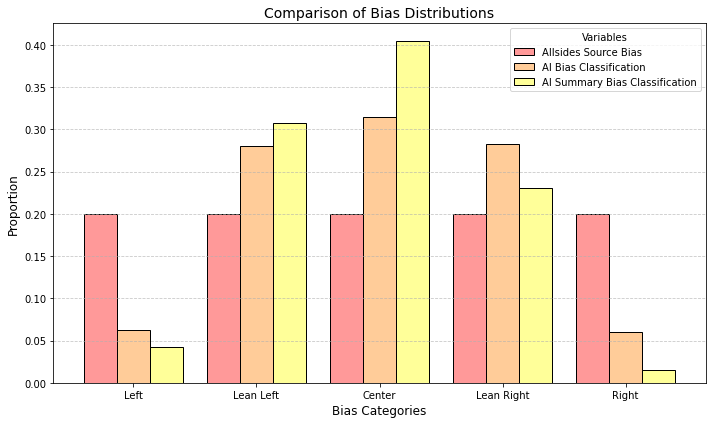

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Categories and colors (adjust if needed)
categories = ["Left", "Lean Left", "Center", "Lean Right", "Right"]
colors = ["#FF9999", "#FFCC99", "#FFFF99", "#99CC99", "#99CCCC"]  # Optional color scheme

# Create a frequency table for each column
distribution = pd.DataFrame({
    'Allsides Source Bias': df2['bias'].value_counts(normalize=True),
    'AI Bias Classification': df2['AI Bias Classification'].value_counts(normalize=True),
    'AI Summary Bias Classification': df2['AI Summary Bias Classification'].value_counts(normalize=True),
}).fillna(0)  # Fill missing values with 0

# Reindex to ensure consistent order of categories
distribution = distribution.reindex(categories)

# Plot grouped bar chart
ax = distribution.plot(kind='bar', figsize=(10, 6), color=colors, width=0.8, edgecolor='black')

# Customize plot
plt.title('Comparison of Bias Distributions', fontsize=14)
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Bias Categories', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title="Variables", fontsize=10, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()